In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the provided CSV files
study_results = pd.read_csv('../Pymaceuticals/data/Study_results.csv')
mouse_metadata = pd.read_csv('../Pymaceuticals/data/Mouse_metadata.csv')

In [15]:
# Merge the two DataFrames on the common column 'Mouse ID'
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [16]:
# Display the number of unique mice IDs
unique_mice_count = merged_data["Mouse ID"].nunique()

In [17]:
# Check for any mouse ID with duplicate time points
duplicate_time_points = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [18]:
# Identify the mouse IDs with duplicate time points
duplicate_mouse_ids = duplicate_time_points["Mouse ID"].unique()

In [19]:
# Display data associated with the mouse ID(s) that have duplicate time points
duplicate_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]

In [20]:
# Remove the data associated with duplicate time points and create a cleaned DataFrame
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

In [21]:
# Display the updated number of unique mice IDs
updated_unique_mice_count = cleaned_data["Mouse ID"].nunique()

#unique_mice_count, duplicate_data, updated_unique_mice_count

In [22]:
# Create a summary statistics DataFrame
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
).reset_index()

In [23]:
# Set 'Drug Regimen' as the index
summary_stats.set_index('Drug Regimen', inplace=True)

print(summary_stats)

                   Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [24]:
# Generate the first bar chart & Count the total number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

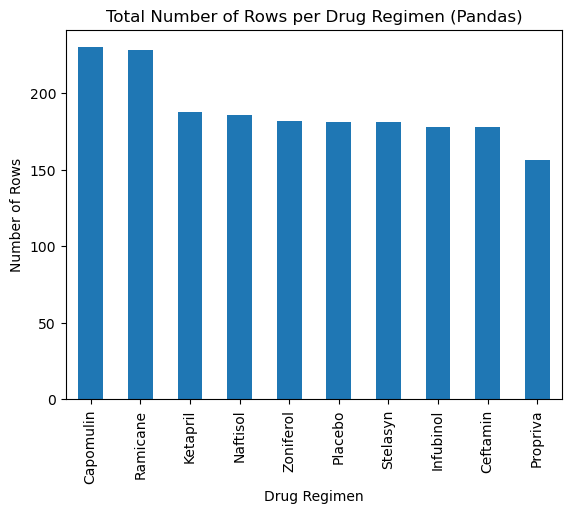

In [25]:
# First bar chart with Pandas
drug_counts.plot(kind='bar', title='Total Number of Rows per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

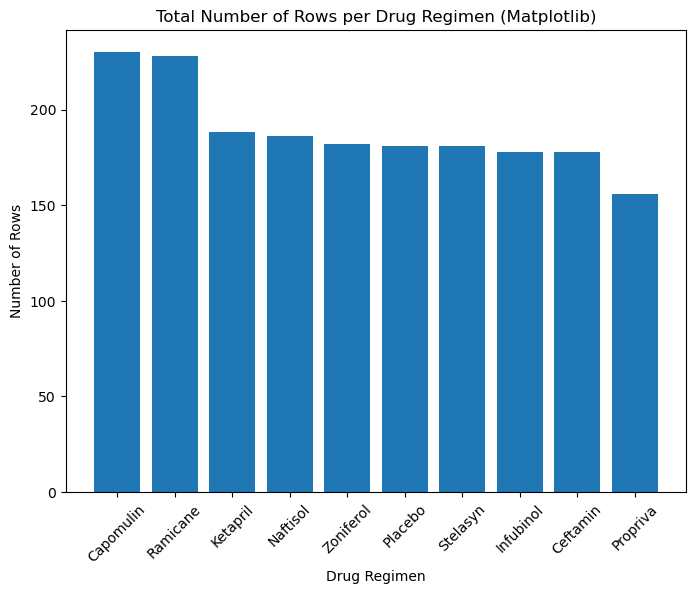

In [26]:
# Generate the second bar chart with Matplotlib's pyplot methods
plt.figure(figsize=(8,6))
plt.bar(drug_counts.index, drug_counts.values)
plt.title('Total Number of Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

In [27]:
# 2a. Generate the first pie chart with Pandas DataFrame method & Count the distribution of unique female vs male mice
gender_distribution = cleaned_data['Sex'].value_counts()

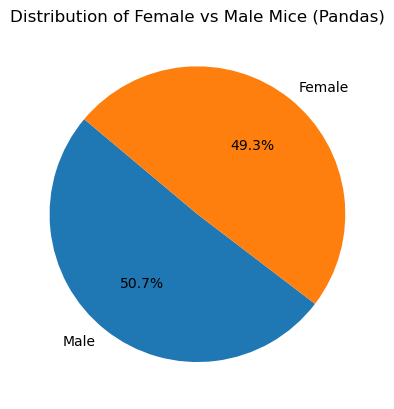

In [28]:
# First pie chart with Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice (Pandas)', startangle=140)
plt.ylabel('')  # Removes the y-label for aesthetics
plt.show()

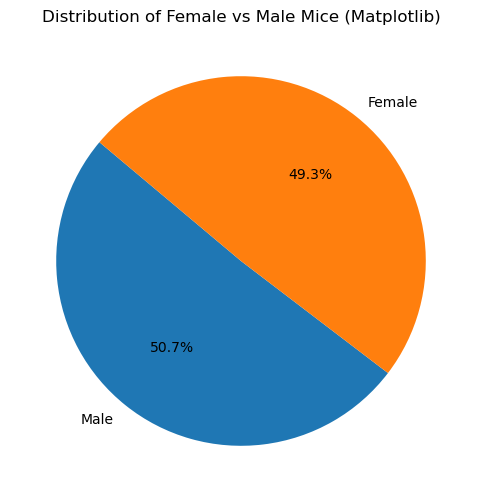

In [30]:
# 2b. Generate the second pie chart with Matplotlib's pyplot methods
plt.figure(figsize=(6,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.show()

In [31]:
# 1a. Create a grouped DataFrame that shows the greatest time point for each mouse and merge it with the cleaned DataFrame
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_max_data = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [32]:
# 1b. Create a list that holds the treatment names and a second empty list for tumor volumes
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

In [33]:
# 1c. Loop through each drug in the treatment list to collect final tumor volumes
for treatment in treatments:
    final_tumor_volumes = merged_max_data[merged_max_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(final_tumor_volumes)

In [34]:
# 1d. Determine outliers by calculating the IQR and using the upper and lower bounds
outlier_results = {}
for i, treatment in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    
    outlier_results[treatment] = {
        'Lower Bound': lowerq,
        'Upper Bound': upperq,
        'IQR': iqr,
        'Lower Bound Limit': lower_bound,
        'Upper Bound Limit': upper_bound,
        'Outliers': outliers
    }

outlier_results

{'Capomulin': {'Lower Bound': 32.37735684,
  'Upper Bound': 40.1592203,
  'IQR': 7.781863460000004,
  'Lower Bound Limit': 20.70456164999999,
  'Upper Bound Limit': 51.83201549,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Ramicane': {'Lower Bound': 31.56046955,
  'Upper Bound': 40.65900627,
  'IQR': 9.098536719999998,
  'Lower Bound Limit': 17.912664470000003,
  'Upper Bound Limit': 54.30681135,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Infubinol': {'Lower Bound': 54.04860769,
  'Upper Bound': 65.52574285,
  'IQR': 11.477135160000003,
  'Lower Bound Limit': 36.83290494999999,
  'Upper Bound Limit': 82.74144559000001,
  'Outliers': 31    36.321346
  Name: Tumor Volume (mm3), dtype: float64},
 'Ceftamin': {'Lower Bound': 48.72207785,
  'Upper Bound': 64.29983003,
  'IQR': 15.577752179999997,
  'Lower Bound Limit': 25.355449580000002,
  'Upper Bound Limit': 87.66645829999999,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa89ef3ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa89ef10d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa89ef2f10>,
 'medians': [<matplotlib.lines.Line2D at 0x1fa89f0d8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa89f0cfd0>,
 'means': []}

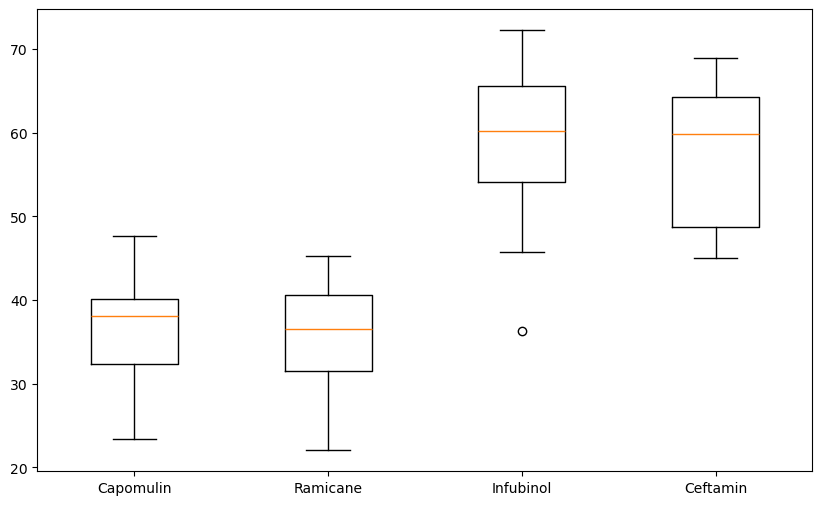

In [35]:
# Generate a box plot for the final tumor volume for each treatment regimen
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments)

In [36]:
# Highlight the outlier in Infubinol (if any) with a different color
outlier_marker = dict(markerfacecolor='r', marker='o')

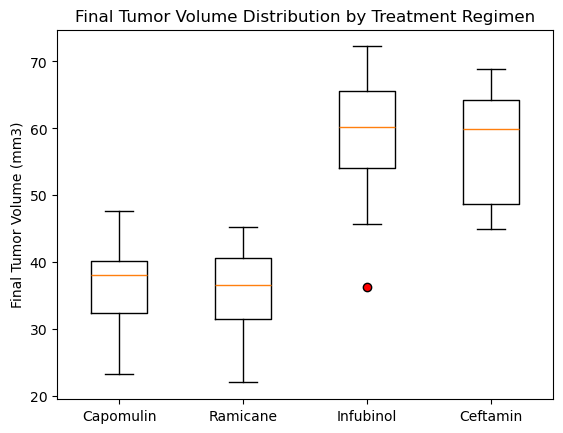

In [37]:
# Creating the boxplot with highlighted outliers
plt.boxplot(tumor_volumes, labels=treatments, flierprops=outlier_marker)
plt.title('Final Tumor Volume Distribution by Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [38]:
# 1. Select a single mouse that was treated with Capomulin and generate a line plot of tumor volume versus time point
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

In [39]:
# Select a single mouse treated with Capomulin
mouse_id = capomulin_data['Mouse ID'].iloc[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

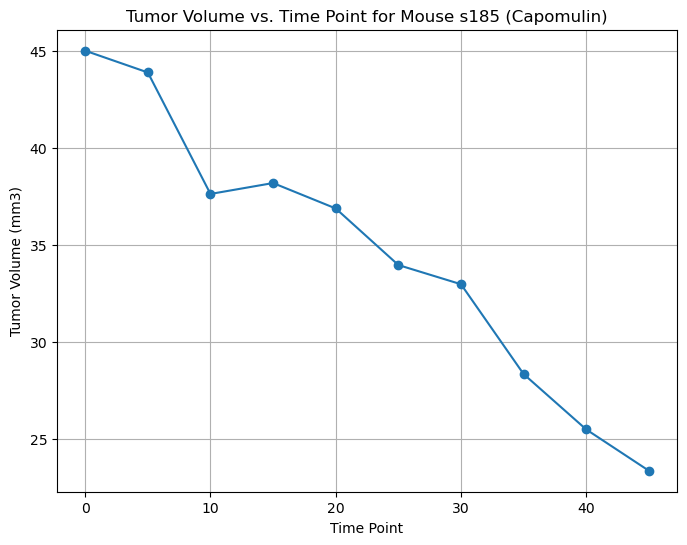

In [40]:
# Generate the line plot
plt.figure(figsize=(8,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [41]:
# 2. Generate a scatter plot of mouse weight versus average observed tumor volume for the Capomulin treatment regimen
# Calculate the average tumor volume per mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

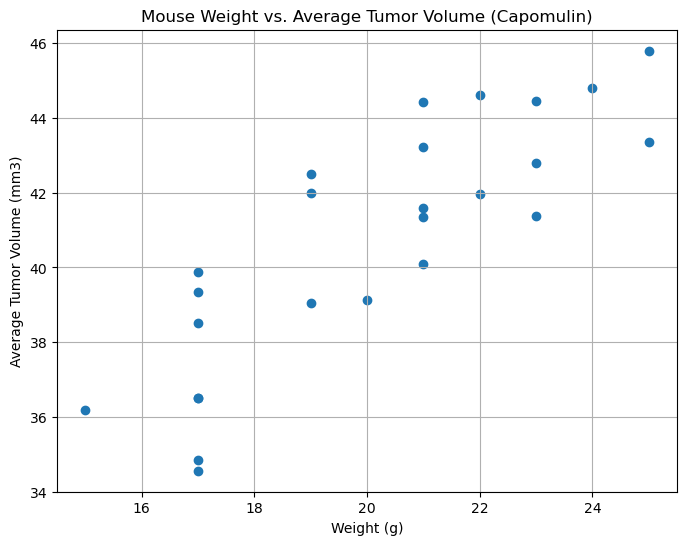

In [42]:
# Generate the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [43]:
from scipy.stats import linregress

In [44]:
# 1. Calculate the correlation coefficient and linear regression model
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']

In [45]:
# Calculate the correlation coefficient
correlation = x_values.corr(y_values)

In [46]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

In [47]:
# Calculate the regression line
regression_line = slope * x_values + intercept

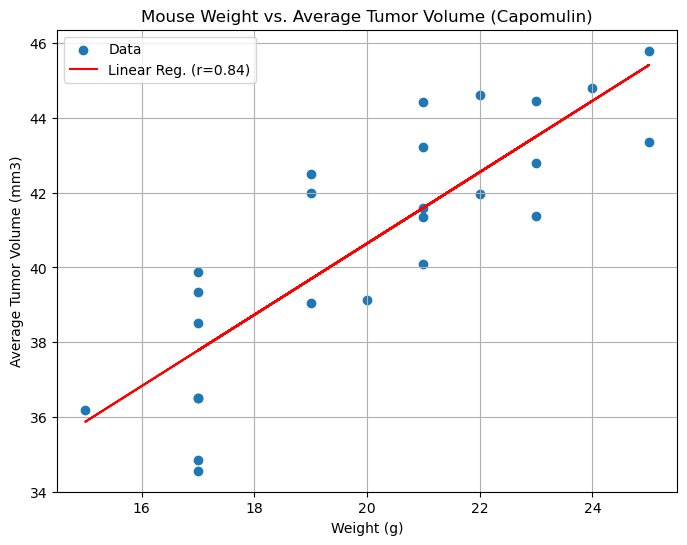

In [48]:
# 2. Plot the linear regression model on top of the previous scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, marker='o', label='Data')
plt.plot(x_values, regression_line, color='r', label=f'Linear Reg. (r={r_value:.2f})')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()